In [ ]:
!pip install --user tweepy==3.3.0
import tweepy
import numpy as np
import pandas
from tweepy import OAuthHandler #serve a fare il login
from tqdm import tqdm_notebook as tqdm 



In [ ]:
!pip install GetOldTweets3

#LISTA UNIVOCA BRAND

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd 
df = pd.read_csv('/content/drive/My Drive/Tabella_unica_finale/db_dettagli_prodotti_clean_4.csv')

In [ ]:
#Preparo la lista dei Brand per la Query

df.head()
my_list = df['Brand'].to_list()
brands=list(dict.fromkeys(my_list))
brands.sort()

brands = list(map(lambda x:x.upper(),brands))
brands = list(map(lambda x:x.replace(" ",""),brands))

brands.pop(1) #elimino il ?
brands = brands[48:]



In [ ]:
import GetOldTweets3 as got
from tqdm import tqdm
import time
dict_={}
for brand in tqdm(brands):
  time.sleep(2)
  try:
    tweetCriteria = got.manager.TweetCriteria().setLang("it")\
                                             .setQuerySearch(f"#{brand}")\
                                             .setSince("2020-01-01")\
                                             .setUntil("2020-07-31")\
                                             .setMaxTweets(10000)
    tweet_hashtag = got.manager.TweetManager.getTweets(tweetCriteria)
    tweetCriteria = got.manager.TweetCriteria().setLang("it")\
                                             .setQuerySearch(f"@{brand}")\
                                             .setSince("2020-01-01")\
                                             .setUntil("2020-07-31")\
                                             .setMaxTweets(10000)
    tweet_mentions = got.manager.TweetManager.getTweets(tweetCriteria)
  except:
    pass
  #summing hashtag and mentions
  dict_[brand]=[int(len(tweet_mentions)),int(len(tweet_hashtag))]

In [ ]:
#Creo 2 colonne una per le mentions ed una per gli Hashtag

import pandas as pd
df = pd.DataFrame(dict_.items(), columns=['Brand', 'Tot_@_and_hash'])
df[['@','#']] = pd.DataFrame(df['Tot_@_and_hash'].tolist(), index= df.index)
del df['Tot_@_and_hash']
df.head(5)


df.to_csv('/content/drive/My Drive/Tabella_unica_finale/lista_brand_social_hash_and_ment_48_inpoi_brand.csv',index=False, header=True)



In [ ]:
#Elimino ciò che non serve e faccio il merge dei 2 dataset perché fatto in 2 tempi diversi visto il blocco di twitter

df1 = pd.read_csv('/content/drive/My Drive/Tabella_unica_finale/lista_brand_social_hash_and_ment_48_inpoi_brand.csv')
df2 = pd.read_csv('/content/drive/My Drive/Tabella_unica_finale/lista_brand_social_hash_and_ment_0_47_brand.csv')
df2 = df2.iloc[0:48,]
df_final = df2.append(df1, ignore_index=True)
df_final.info()
df_final.to_csv('/content/prova.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Brand   77 non-null     object
 1   @       77 non-null     int64 
 2   #       77 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ KB


In [ ]:
#Faccio l'append della colonna del Brand prima della query in modo che si possa fare velocemente una join

df = pd.read_csv('/content/drive/My Drive/Tabella_unica_finale/db_dettagli_prodotti_clean_4.csv')
df.head()
my_list = df['Brand'].to_list()
brands=list(dict.fromkeys(my_list))
brands.sort()
brands.pop(1) #elimino il ?

print(len(brands))
brands

df_final[['Old_brands']] = pd.DataFrame(brands,index= df_final.index)
df_final = df_final[df_final.columns[[3,0,1,2]]]

df_final=df_final.rename(columns = {'Brand':'Brand_from_query'})
#df_final
df_final.to_csv('/content/drive/My Drive/Tabella_unica_finale/lista_brand_social_final.csv',index=False, header=True)




77


In [1]:
!pip install --user wordcloud
!pip install --user matplotlib

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
from PIL import Image

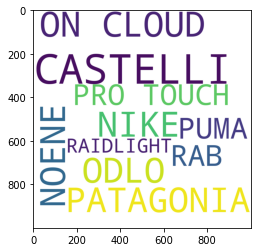

In [ ]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_)
plt.imshow(wc)